### Momentum Optimization

Iteration 1: theta = 4.4000, loss = 5.7600
Iteration 2: theta = 3.3800, loss = 1.9044
Iteration 3: theta = 2.1860, loss = 0.0346
Iteration 4: theta = 1.0742, loss = 0.8571
Iteration 5: theta = 0.2587, loss = 3.0320
Iteration 6: theta = -0.1269, loss = 4.5238
Iteration 7: theta = -0.0486, loss = 4.1969
Iteration 8: theta = 0.4316, loss = 2.4600
Iteration 9: theta = 1.1774, loss = 0.6767
Iteration 10: theta = 2.0132, loss = 0.0002
Iteration 11: theta = 2.7628, loss = 0.5818
Iteration 12: theta = 3.2848, loss = 1.6508
Iteration 13: theta = 3.4977, loss = 2.2432
Iteration 14: theta = 3.3898, loss = 1.9315
Iteration 15: theta = 3.0147, loss = 1.0296
Iteration 16: theta = 2.4741, loss = 0.2248
Iteration 17: theta = 1.8928, loss = 0.0115
Iteration 18: theta = 1.3911, loss = 0.3708
Iteration 19: theta = 1.0613, loss = 0.8811
Iteration 20: theta = 0.9522, loss = 1.0978
Iteration 21: theta = 1.0636, loss = 0.8768
Iteration 22: theta = 1.3512, loss = 0.4210
Iteration 23: theta = 1.7397, loss = 0.

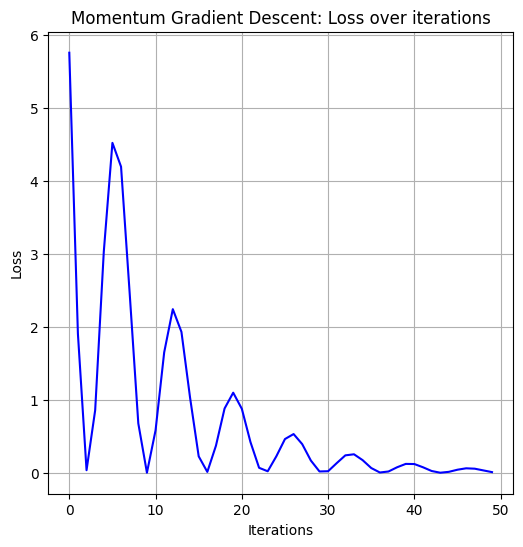

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def loss_function(theta):
    return (theta - 2) ** 2

def gradient(theta):
    return 2 * (theta - 2)

def momentum_optimizer(lr_rate, beta, initial_theta, num_iter):
    theta = initial_theta
    v = 0
    history = []
    for t in range(num_iter):
        grad = gradient(theta)
        v = beta * v + lr_rate * grad
        theta = theta - v
        
        loss = loss_function(theta)
        
        history.append((theta, loss))
        
        print(f"Iteration {t+1}: theta = {theta:.4f}, loss = {loss:.4f}")
        
    return theta, history

final_theta, history = momentum_optimizer(0.1, 0.9, 5.0, 50)

theta_values = [x[0] for x in history]
loss_values = [x[1] for x in history]

plt.figure(figsize= (6, 6))
plt.plot(loss_values, label= 'Loss Over Iterations', color= 'b')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Momentum Gradient Descent: Loss over iterations")
plt.grid(True)

plt.show()


### Nesterov Accelerated Gradient

The Nesterov Accelerated Gradient (NAG) is an extension of the momentum-based gradient descent. In NAG, instead of calculating the gradient at the current position, we calculate it at the position where the momentum is "leading" the parameter to go. This anticipatory gradient improves the optimization's speed.

Key steps:
First, compute a temporary "lookahead" step, anticipating where the parameter will be if we follow the velocity.
Compute the gradient at this lookahead position.
Update the velocity and parameters.

Iteration 1: theta = 4.4000, loss = 5.7600
Iteration 2: theta = 3.4880, loss = 2.2141
Iteration 3: theta = 2.5338, loss = 0.2849
Iteration 4: theta = 1.7400, loss = 0.0676
Iteration 5: theta = 1.2204, loss = 0.6077
Iteration 6: theta = 1.0023, loss = 0.9954
Iteration 7: theta = 1.0448, loss = 0.9125
Iteration 8: theta = 1.2664, loss = 0.5382
Iteration 9: theta = 1.5727, loss = 0.1826
Iteration 10: theta = 1.8787, loss = 0.0147
Iteration 11: theta = 2.1233, loss = 0.0152
Iteration 12: theta = 2.2747, loss = 0.0755
Iteration 13: theta = 2.3288, loss = 0.1081
Iteration 14: theta = 2.3020, loss = 0.0912
Iteration 15: theta = 2.2223, loss = 0.0494
Iteration 16: theta = 2.1204, loss = 0.0145
Iteration 17: theta = 2.0230, loss = 0.0005
Iteration 18: theta = 1.9483, loss = 0.0027
Iteration 19: theta = 1.9048, loss = 0.0091
Iteration 20: theta = 1.8925, loss = 0.0115
Iteration 21: theta = 1.9052, loss = 0.0090
Iteration 22: theta = 1.9333, loss = 0.0045
Iteration 23: theta = 1.9668, loss = 0.00

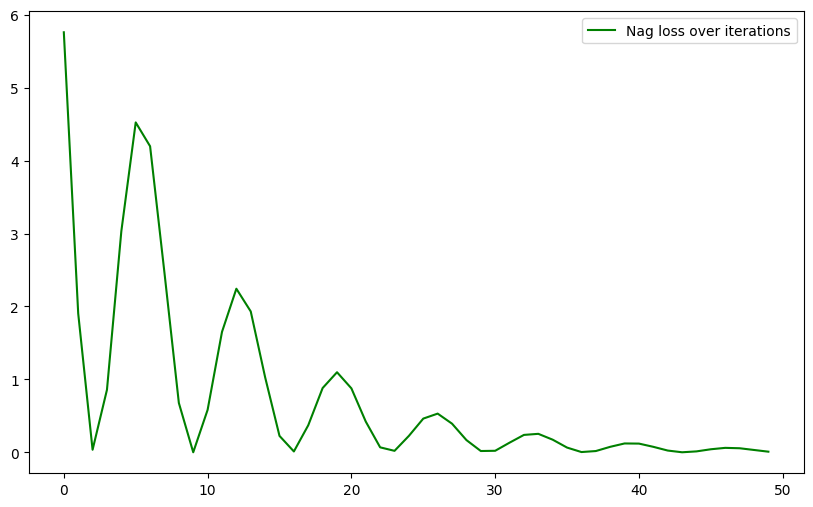

In [6]:
def nag_gradient(lr_rate, beta, intial_theta, num_iterations):
    theta = intial_theta
    v = 0
    history = []
    for t in range(num_iterations):
        lookahead_theta = theta - beta*v
        grad = gradient(lookahead_theta)
        v = beta * v + lr_rate * grad
        theta = theta - v
        loss = loss_function(theta)
        history.append((theta, loss))
        print(f"Iteration {t+1}: theta = {theta:.4f}, loss = {loss:.4f}")
        
    return theta, history

final_theta, history_nag = nag_gradient(0.1, 0.9, 5.0, 50)
iterations_nag = list(range(1, len(history_nag) + 1))
theta_values_nag = [x[0] for x in history]
loss_values_nag = [x[1] for x in history]

plt.figure(figsize= (10, 6))
plt.plot(loss_values_nag, label= 'Nag loss over iterations', color= 'green')

#for i, (theta, loss) in enumerate(history_nag):
    #plt.text(iterations_nag[i], loss, f'0= {theta:.2f}', fontsize= 8, ha= 'right')
plt.legend()
plt.show()

### AdaGrad

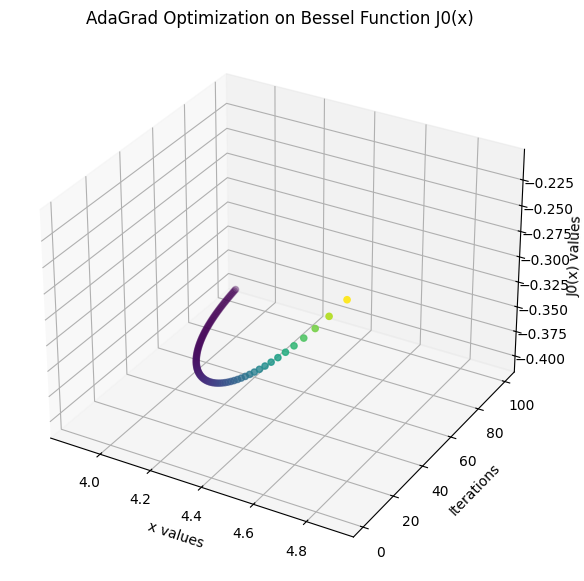

In [10]:
from scipy.special import jn
def bessel_j0(x):
    return jn(0, x)

def gradient_bessel_j0(x):
    h = 1e-5  
    return (bessel_j0(x + h) - bessel_j0(x - h)) / (2 * h)

def adagrad_bessel(learning_rate, initial_x, num_iterations, epsilon=1e-8):
    x = initial_x  
    G = 0  
    history = []  

    for t in range(num_iterations):
        grad = gradient_bessel_j0(x)
        G += grad ** 2
        x = x - (learning_rate / (np.sqrt(G) + epsilon)) * grad
        history.append((x, bessel_j0(x)))
    return x, history

learning_rate = 0.1
initial_x = 5.0  
num_iterations = 100
final_x, history_adagrad_bessel = adagrad_bessel(learning_rate, initial_x, num_iterations)

x_values = [x[0] for x in history_adagrad_bessel]
j0_values = [x[1] for x in history_adagrad_bessel]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
iterations_adagrad = np.arange(1, len(x_values) + 1)
ax.scatter(x_values, iterations_adagrad, j0_values, c=j0_values, cmap='viridis')
ax.set_xlabel('x values')
ax.set_ylabel('Iterations')
ax.set_zlabel('J0(x) values')
ax.set_title('AdaGrad Optimization on Bessel Function J0(x)')
plt.show()
